# Importing all the liabraries-

In [18]:
#importing all the liabraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#Accessing and reading the file-

In [3]:
hr = pd.read_csv("/content/HR Promotion.csv")

In [3]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#Checking the null values-

In [5]:
hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#Dealing with null values-

In [6]:
hr['education'].value_counts() # bcz its a object

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [7]:
hr['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [8]:
hr['previous_year_rating'].value_counts()  # rating is a category though its type is float hence we are not using mean median

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [9]:
hr['previous_year_rating'].mode() # it will just give the mode

0    3.0
Name: previous_year_rating, dtype: float64

In [10]:
#replacing the null values with mode-
hr['education']=hr['education'].fillna("Bachelor's")
hr['previous_year_rating']=hr['previous_year_rating'].fillna(3.0)

In [11]:
hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#EDA-


#1) What is the gender-wise average training score?

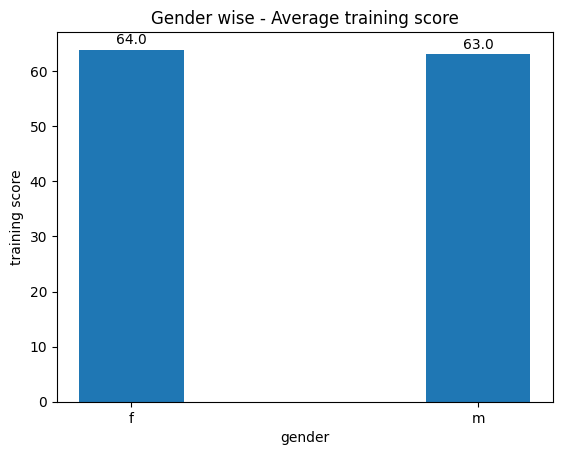

In [132]:
df1 = hr.groupby('gender')['avg_training_score'].mean().reset_index()
df1
round_value=round(df1['avg_training_score'])
plt.bar(df1['gender'],df1['avg_training_score'],width=0.3)
for i ,value in enumerate(round_value):
  plt.text(i,value+0.5,str(value),ha='center',va='bottom')
plt.title("Gender wise - Average training score")
plt.xlabel("gender")
plt.ylabel("training score")
plt.show()



#2) Department-wise employee count?

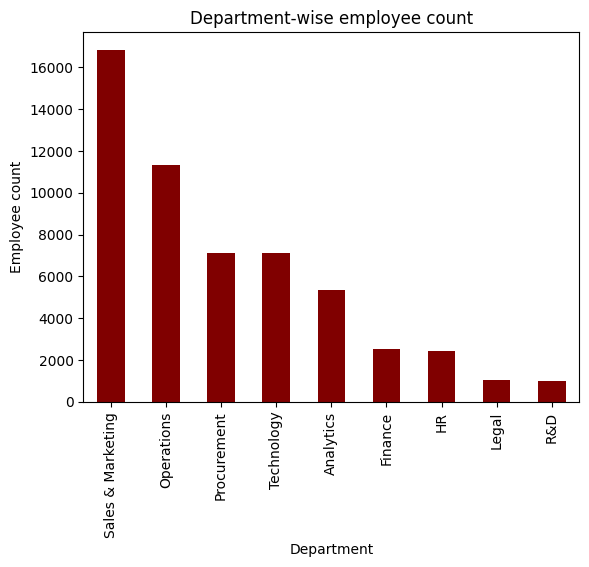

In [85]:
department_count = hr['department'].value_counts()
department_count
department_count.plot(kind='bar',color='maroon')
plt.title("Department-wise employee count")
plt.xlabel("Department")
plt.ylabel("Employee count")
plt.show()



#3) Explain the gender-wise distribution of awards won by the employees.


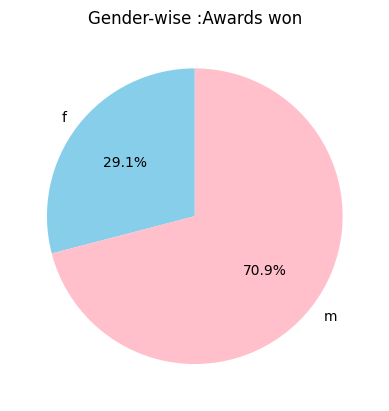

In [104]:
df3 =hr.groupby('gender')['awards_won?'].sum().reset_index()
df3
data=df3['gender']
values=df3['awards_won?']
plt.pie(values,labels=data,autopct='%1.1f%%', startangle=90,colors=['skyblue','pink'])
plt.title("Gender-wise :Awards won")
plt.show()


#4) Age-wise :Awards Won?

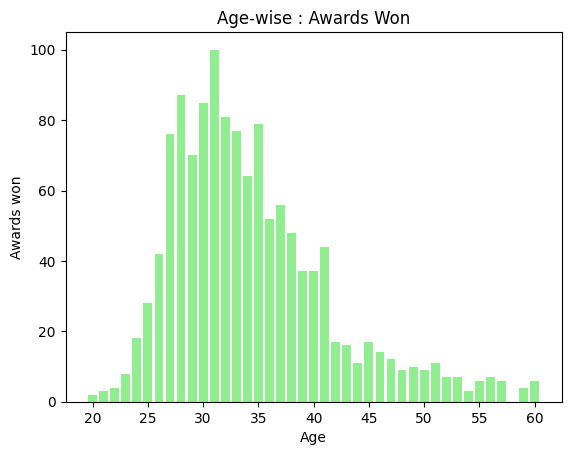

In [108]:
df4 = hr.groupby('age')['awards_won?'].sum().reset_index()
df4
plt.bar(df4['age'],df4['awards_won?'],color=['lightgreen'])
plt.xlabel("Age")
plt.ylabel("Awards won")
plt.title("Age-wise : Awards Won")
plt.show()

# 5)How many employees have been promoted?

In [6]:
promoted = hr['is_promoted']==1
promoted_emp =promoted.value_counts()
promoted_emp[1]


4668

#6) What is the average length of service considering the gender?

In [11]:
df5=hr.groupby('gender')['length_of_service'].mean().reset_index()
df5


,gender,length_of_service
0,f,5.994421
1,m,5.810889


# 7)Gender-wise trainings given to the employees?

In [16]:
df6 = hr.groupby('gender')['no_of_trainings'].sum().reset_index()
df6


,gender,no_of_trainings
0,f,19149
1,m,49526


# 8) Age-wise Promoted employees-

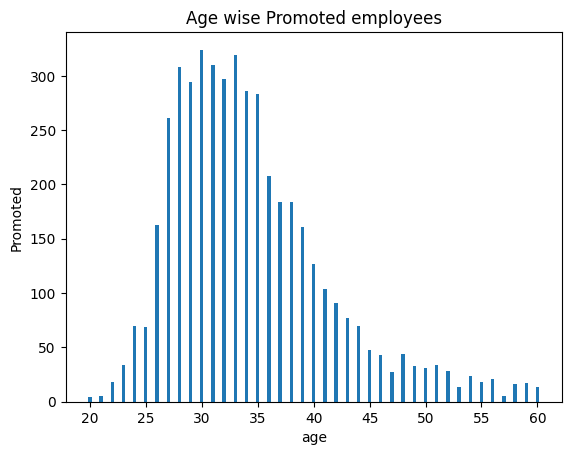

In [26]:
df7 = hr.groupby('age')['is_promoted'].sum().reset_index()
df7
plt.bar(df7['age'],df7['is_promoted'],width=0.3)
plt.xlabel("age")
plt.ylabel('Promoted')
plt.title("Age wise Promoted employees")
plt.show()

#Converting object datatype into category -

In [12]:
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [13]:
cat_col = ['department','region','education','gender','recruitment_channel','previous_year_rating']

In [14]:
for i in cat_col:
  hr[i]=hr[i].astype('category')

In [15]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  54808 non-null  category
 9   length_of_service     54808 non-null  int64   
 10  KPIs_met >80%         54808 non-null  int64   
 11  awards_won?           54808 non-null  int64   
 12  avg_training_score    54808 non-null  int64   
 13  is_promoted           54808 non-null  int64   
dtypes: category(6), int64(8)
memory usage: 3.7 MB


# One-Hot Encoding -

In [16]:
# converting categorical into numerical using get dummies
hr_dummy = pd.get_dummies(hr,columns=cat_col,drop_first=True)
hr_dummy.head()

,employee_id,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,65438,1,35,8,1,0,49,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,65141,1,30,4,0,0,60,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,7513,1,34,7,0,0,50,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2542,2,39,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,48945,1,45,2,0,0,73,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Defining x and y variables-

In [17]:
y=hr_dummy[['is_promoted']]
x=hr_dummy.drop(columns=['employee_id','is_promoted'])

In [18]:
hr_dummy['is_promoted'].unique() # our dependent variable is categorical hence we will use classification model

array([0, 1])

# Dividing data into train and test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2023)

In [20]:
# binary classification : Y variavle--2 variables then we use logistic regression

# Building the model

In [21]:
dtree = DecisionTreeClassifier()
model=dtree.fit(x_train,y_train)
model

DecisionTreeClassifier()

# Lets predict on test data

In [22]:
y_test

,is_promoted
20965,0
44669,0
6116,1
13933,0
27179,0
...,...
33818,0
20419,0
45578,0
28320,0


In [23]:
y_test['Predicted']=model.predict(x_test)
y_test

,is_promoted,Predicted
20965,0,0
44669,0,0
6116,1,1
13933,0,0
27179,0,0
...,...,...
33818,0,0
20419,0,0
45578,0,0
28320,0,0


In [24]:
print(classification_report(y_test['is_promoted'],y_test['Predicted']))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15080
           1       0.41      0.46      0.44      1363

    accuracy                           0.90     16443
   macro avg       0.68      0.70      0.69     16443
weighted avg       0.91      0.90      0.90     16443



In [25]:
print(confusion_matrix(y_test['is_promoted'],y_test['Predicted']))

[[14174   906]
 [  732   631]]


# Testing our model on validation dataset-

In [27]:
hr_validation = pd.read_csv("/content/HR Promotion Validation.csv")

In [28]:
hr_validation.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [29]:
hr_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [30]:
hr_validation.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [31]:
#replacing the null valuese
hr_validation['education']=hr_validation['education'].fillna("Bachelor's")
hr_validation['previous_year_rating']=hr_validation['previous_year_rating'].fillna(3.0)

In [32]:
hr_validation.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [33]:
cat_col1 = ['department','region','education','gender','recruitment_channel','previous_year_rating']

for i in cat_col1:
  hr_validation[i]=hr_validation[i].astype('category')

In [34]:
hr_val_dummy = pd.get_dummies(hr_validation,columns=cat_col1,drop_first=True)
hr_val_dummy.head()

,employee_id,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,8724,1,24,1,1,0,77,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,74430,1,31,5,0,0,51,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,72255,1,31,4,0,0,47,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,38562,3,31,9,0,0,65,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,64486,1,30,7,0,0,61,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [35]:
x_validation = hr_val_dummy.drop(columns=['employee_id'])

In [36]:
x_validation

,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,1,24,1,1,0,77,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,1,31,5,0,0,51,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,31,4,0,0,47,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,31,9,0,0,65,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,30,7,0,0,61,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,1,0,0,61,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
23486,1,31,7,0,0,74,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
23487,1,26,4,0,0,50,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
23488,3,27,1,0,0,70,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [37]:
x_validation.columns

Index(['no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_6',
       'region

In [38]:
hr_validation['Predicted promotion']=model.predict(x_validation)
hr_validation

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Predicted promotion
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,1
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,0


In [39]:
hr_validation['Predicted promotion']

0        1
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    0
Name: Predicted promotion, Length: 23490, dtype: int64

In [40]:
hr_validation['Predicted promotion'].value_counts()

0    21365
1     2125
Name: Predicted promotion, dtype: int64

In [41]:
hr_validation.to_excel("promotion_predictions.xlsx")